#Práctico 3: Cluster jerárquico

El artículo seleccionado es **Cluster Analysis in Patients with GOLD 1
Chronic Obstructive Pulmonary Disease**, un trabajo donde se busca caracterizar la heterogeneidad de la enfermedad Chronic Obstructive Pulmonary Disease (COPD) dentro de la clasificación entregada por la organización *Global Initiative for Chronic Obstructive Lung Disease (GOLD)*.

A diferencia de otros trabajo que implementan clusters, su objetivo no era dividir entre enfermos y control, sino explorar variables que describen la enfermedad de acuerdo a los criterios establecidos por la organización GOLD.

En este práctico aplicarán clasificación con diferentes algoritmos de cluster, con ayuda de los conocimiento de manejo de datos de prácticos anteriores y la librería Sklearn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import drive #importar desde drive a colab

In [ ]:
drive.mount('/content/drive') #acceden a sus documentos de drive

Mounted at /content/drive


### Importar y pre-procesar los datos

En la carpeta *Datos* dentro de la carpeta *Práctico 3* podrán encontrar los datos del artículo.

Primero importamos los datos y adaptamos las columnas originales al formato aceptado por la mayoría de las librerías, es decir, sin datos del tipo NaN o columnas con *strings*

Recuerden poner la ruta correcta de acuerdo a la ubicación del archivo en su carpeta de drive

In [ ]:
ruta =  '/content/drive/MyDrive/Curso/Practico 3/Datos/S1_Dataset.xls'
data = pd.read_excel(ruta)
data

,GROUP,Cluster,Control vs GOLD Clusters,Origin of Data (Clinical Trial),"Gender\n(1=Male,\n2=Female)",Age\n(years),Height\n(cm),Height\n(m),Weight\n(kg),BMI\n(kg/m2),...,Borg Score - \nLeg Max,"Limiting Symptom\n(1=Dyspnea,\n2=Leg Fatigue,\n3=General Fatigue,\n4=Other Reasons)",Steps/day,Mean Daily Time >3 mets\n(min),Mean Daily Energy Expenditure >3 mets\n(kcal),Hypertension\n(1=Yes),Dyslipidemia\n(1=Yes),Coronary Heart Disease\n(1=Yes),Diabetes \n(1=Yes),Neoplasia\n(1=Yes)
0,COPD GOLD stage I,1,1,NCT01072396,2,70,176.0,1.760,77.3,24.700000,...,4.0,2,8636.938,75.01230,566.93025,1.0,NaN,NaN,NaN,NaN
1,COPD GOLD stage I,1,1,NCT01072396,2,56,159.0,1.590,49.5,19.800000,...,9.0,1,2841.976,84.00000,427.74925,NaN,1.0,NaN,NaN,NaN
2,COPD GOLD stage I,1,1,NCT01072396,1,52,182.8,1.828,107.9,32.200000,...,5.0,3,9898.029,89.62476,907.03400,NaN,NaN,NaN,NaN,NaN
3,COPD GOLD stage I,1,1,NCT01072396,2,65,166.0,1.660,70.8,25.800000,...,3.0,2,8448.015,75.00492,560.85925,1.0,NaN,NaN,NaN,NaN
4,COPD GOLD stage I,1,1,NCT01072396,2,64,164.0,1.640,60.9,22.200000,...,6.0,3,8319.044,92.97276,560.04925,NaN,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Control,2,Control,NCT01360788,1,66,173.0,1.730,78.1,26.095092,...,3.5,1,8470.000,102.00000,504.00000,NaN,NaN,NaN,NaN,NaN
199,Control,2,Control,NCT01360788,1,67,179.0,1.790,97.0,30.273712,...,6.5,3,7613.000,108.00000,682.00000,NaN,NaN,NaN,NaN,NaN
200,Control,2,Control,NCT01360788,1,67,168.0,1.680,82.0,29.053288,...,5.0,1,10749.000,250.00000,1337.00000,NaN,NaN,NaN,NaN,NaN
201,Control,3,Control,NCT01360788,1,56,164.0,1.640,106.0,39.411065,...,3.0,1,7682.000,62.00000,414.00000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Las últimas columnas del dataframe contiene elementos del tipo NaN (not a number)
#En este caso vamos a hacer que las NaN sean 0, dado que el valor 1 representa la existencia de una condición.
data.fillna(0, inplace = True) #Con el argumento inplace = True no necesitamos crear un nuevo objeto
#una de las columnas es no numérica, en un comienzo la vamos a eliminar
data.drop('LLN Status', axis=1, inplace=True)
data

,GROUP,Cluster,Control vs GOLD Clusters,Origin of Data (Clinical Trial),"Gender\n(1=Male,\n2=Female)",Age\n(years),Height\n(cm),Height\n(m),Weight\n(kg),BMI\n(kg/m2),...,Borg Score - \nLeg Max,"Limiting Symptom\n(1=Dyspnea,\n2=Leg Fatigue,\n3=General Fatigue,\n4=Other Reasons)",Steps/day,Mean Daily Time >3 mets\n(min),Mean Daily Energy Expenditure >3 mets\n(kcal),Hypertension\n(1=Yes),Dyslipidemia\n(1=Yes),Coronary Heart Disease\n(1=Yes),Diabetes \n(1=Yes),Neoplasia\n(1=Yes)
0,COPD GOLD stage I,1,1,NCT01072396,2,70,176.0,1.760,77.3,24.700000,...,4.0,2,8636.938,75.01230,566.93025,1.0,0.0,0.0,0.0,0.0
1,COPD GOLD stage I,1,1,NCT01072396,2,56,159.0,1.590,49.5,19.800000,...,9.0,1,2841.976,84.00000,427.74925,0.0,1.0,0.0,0.0,0.0
2,COPD GOLD stage I,1,1,NCT01072396,1,52,182.8,1.828,107.9,32.200000,...,5.0,3,9898.029,89.62476,907.03400,0.0,0.0,0.0,0.0,0.0
3,COPD GOLD stage I,1,1,NCT01072396,2,65,166.0,1.660,70.8,25.800000,...,3.0,2,8448.015,75.00492,560.85925,1.0,0.0,0.0,0.0,0.0
4,COPD GOLD stage I,1,1,NCT01072396,2,64,164.0,1.640,60.9,22.200000,...,6.0,3,8319.044,92.97276,560.04925,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Control,2,Control,NCT01360788,1,66,173.0,1.730,78.1,26.095092,...,3.5,1,8470.000,102.00000,504.00000,0.0,0.0,0.0,0.0,0.0
199,Control,2,Control,NCT01360788,1,67,179.0,1.790,97.0,30.273712,...,6.5,3,7613.000,108.00000,682.00000,0.0,0.0,0.0,0.0,0.0
200,Control,2,Control,NCT01360788,1,67,168.0,1.680,82.0,29.053288,...,5.0,1,10749.000,250.00000,1337.00000,0.0,0.0,0.0,0.0,0.0
201,Control,3,Control,NCT01360788,1,56,164.0,1.640,106.0,39.411065,...,3.0,1,7682.000,62.00000,414.00000,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Las 'clases' de problema
data['GROUP'].unique() #estas vendrían siendo nuestras etiquetas

array(['COPD GOLD stage I', 'Control'], dtype=object)

##Actividad
Divida el dataframe anterior llamado *data* en 3 dataframes:



1.   Clases de cada muestra:


*   Crea un nuevo DataFrame llamado clases_df que contenga todas las filas y solo la columna 'GROUP' del DataFrame original.

2.  Clusters de cada muestra:



*   Crea un nuevo DataFrame llamado clusters_df que contenga todas las filas y solo la columna 'Cluster' del DataFrame original.

*   Cambia el nombre de la columna 'Cluster' a 'Original' con el siguiente comando:

```
tu_dataframe.rename(columns={'Cluster': 'Original'}, inplace=True)
```

3.  Características asociadas a cada instancia:

*   Crea un nuevo DataFrame llamado X_df que contenga todas las filas y todas las columnas a partir de la columna 4 del DataFrame original.



In [ ]:
#Rellene con sus dataframes

clases_df = data['GROUP']
clusters_df = pd.DataFrame(data.loc[:,'Cluster'])
clusters_df.rename(columns={'Cluster': 'Original'}, inplace=True)
X_df = data.iloc[:, 4:].copy()


## Clusters con Sklearn

El día de hoy revisaremos las técnicas de cluster disponibles en la librería scikit learn y las aplicaremos a nuestro set de datos anterior.

[Cluster disponibles en Sklearn](https://scikit-learn.org/stable/modules/clustering.html)


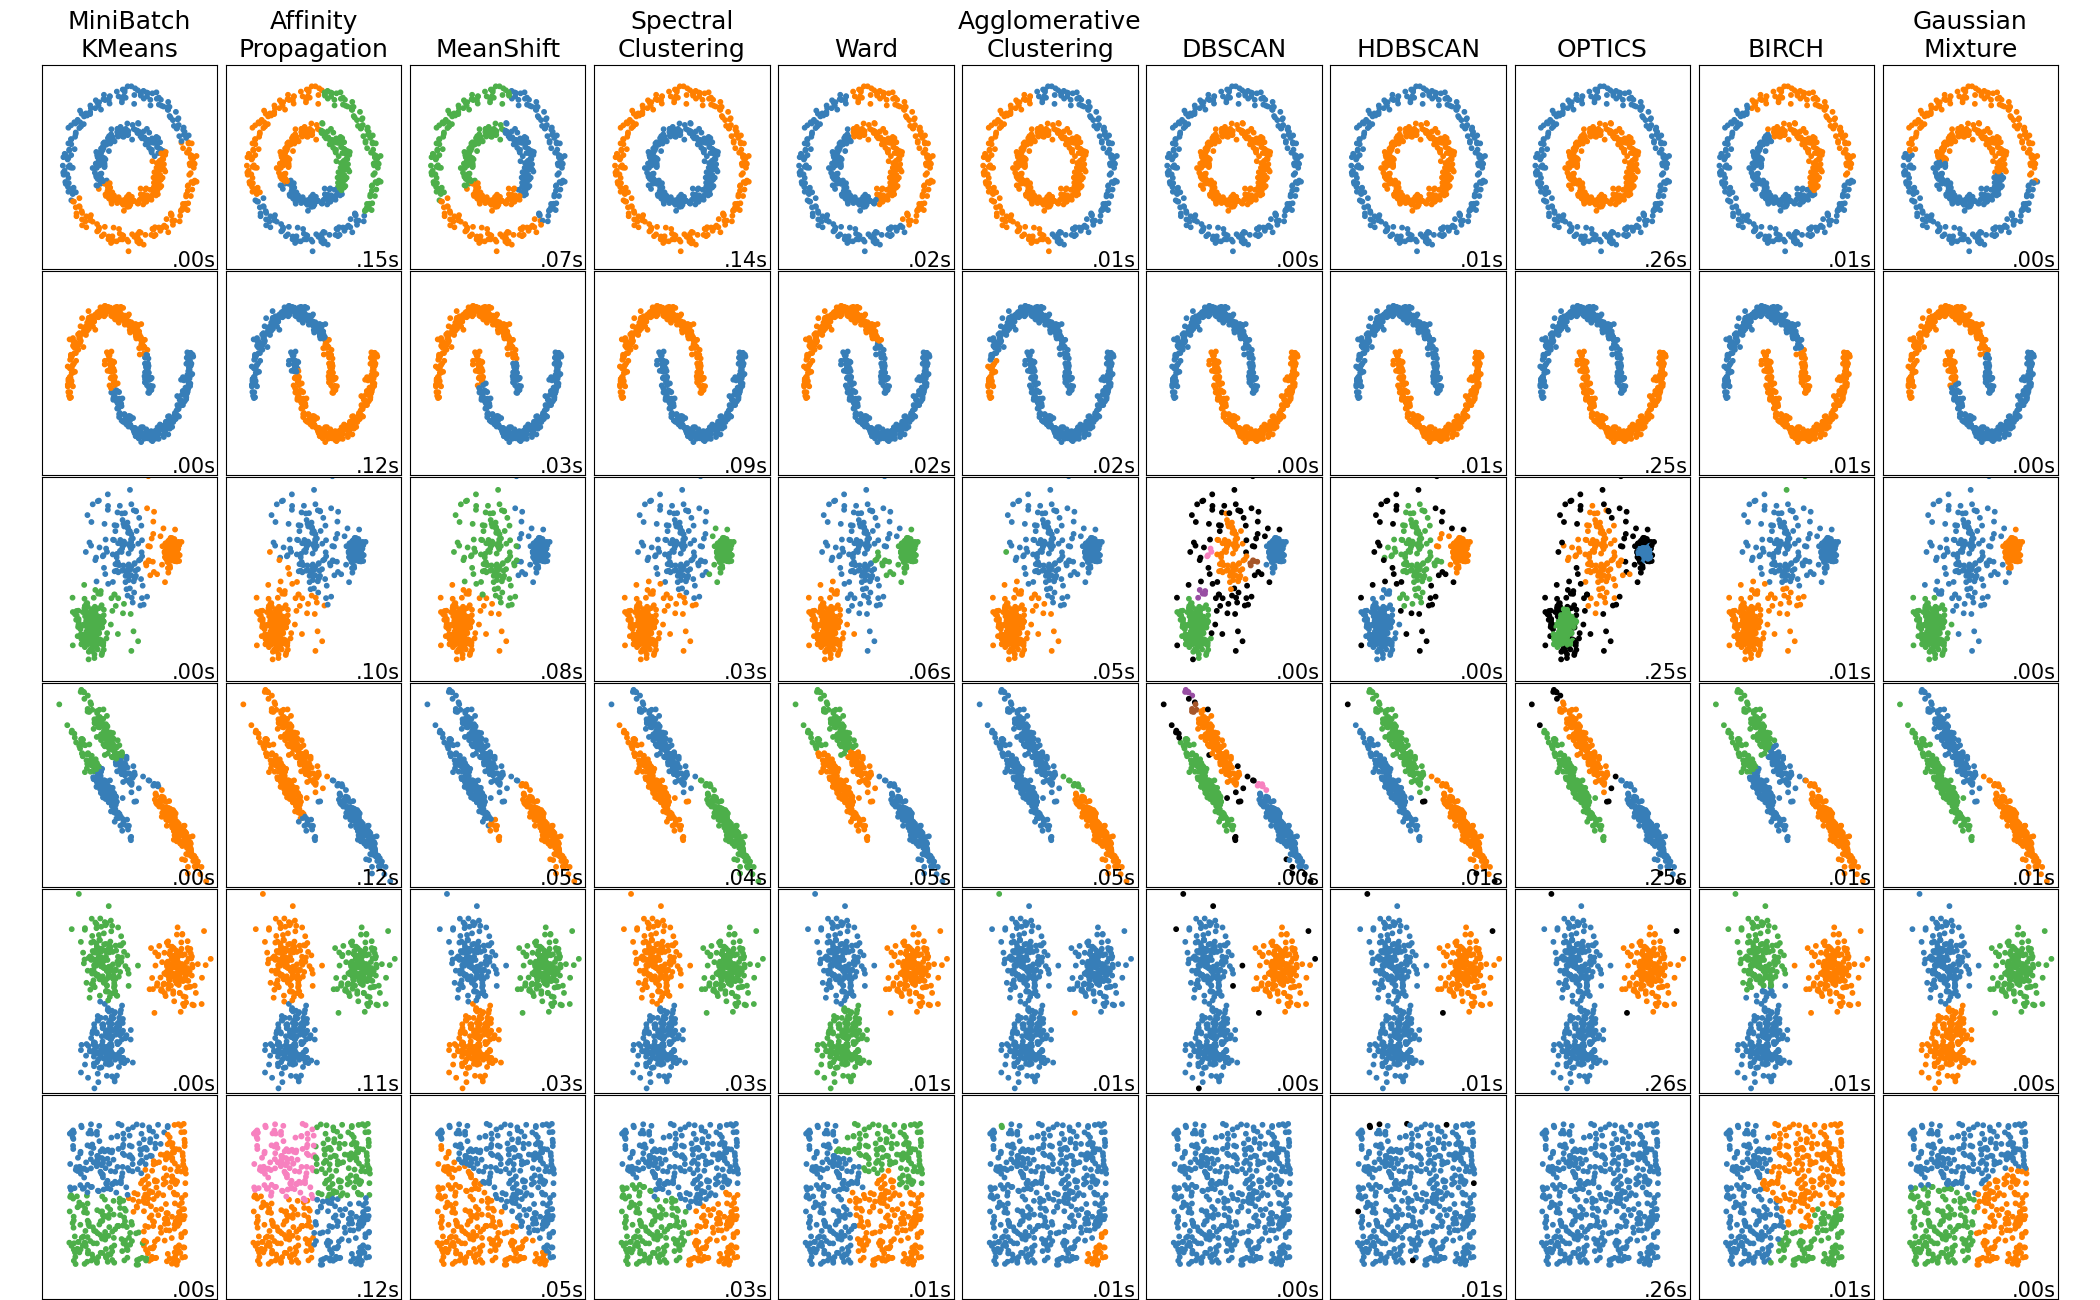




##Selección de número de clusters.

Gráfica del artículo seleccionado la cual muestra los resultado obtenidos al aplicar las métricas pseudo F, Psuedo T^2 y cubic cluster criterion para seleccionar el nuúmero de clusters.

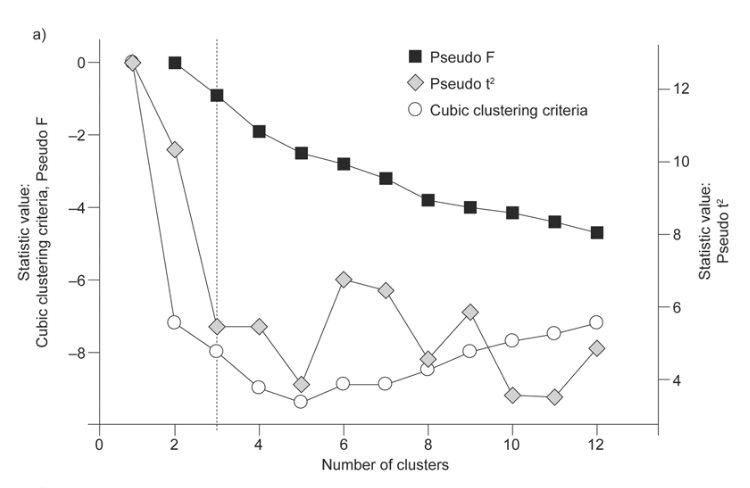

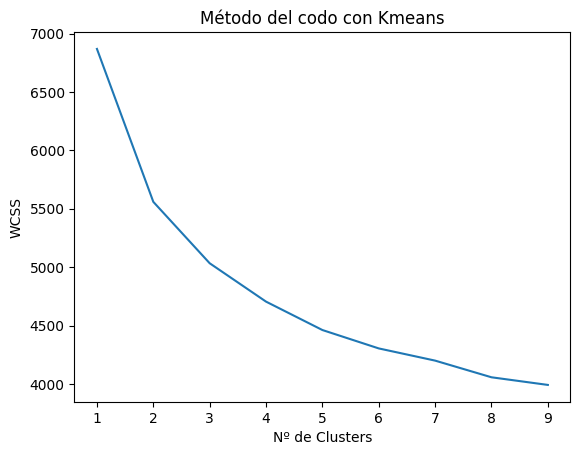

In [ ]:
#Ahora aplicando el método del codo visto en clases por medio del algoritmo K-medias
from sklearn.cluster import KMeans

X = X_df.to_numpy()
rm = 10
m = 300
title = 'Método del codo con Kmeans'

wcss_s = []
r = range(1,rm)

for i in r:
  kmeans = KMeans(n_clusters=i, max_iter=m, n_init=10)
  kmeans.fit(X)
  wcss_s.append(kmeans.inertia_)

plt.plot(r, wcss_s)
plt.title(title)
plt.xlabel("Nº de Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Vamos a definir el número de cluster como un entero (int) para que sea consistente dentro de toda la ejecución
Nc = 3 #Número de grupos
X = X_df.to_numpy()

### Algoritmos
A continuación encontrar muchos algoritmos presentes en la librería de Sklearn. Todos ellos, a excepción de Agglomerative Clustering, mantienen los parámetros por defecto entrgados por Sklearn. El único parámetro que fue modificado fue el número de cluster

In [ ]:
#KMedias
kmeans = KMeans(n_clusters=Nc, init = 'k-means++', random_state=0, n_init="auto").fit(X)
clusters_df['Kmeans'] = kmeans.labels_

In [ ]:
#Affinity Propagation
from sklearn.cluster import AffinityPropagation

clustering_ap = AffinityPropagation(random_state=5).fit(X)
clusters_df['Affinity Propagation'] = clustering_ap.labels_

In [ ]:
#Mean Shift
from sklearn.cluster import MeanShift

clustering_ms = MeanShift(bandwidth=5).fit(X)
clusters_df['MeanShift'] = clustering_ms.labels_

In [ ]:
#Spectral Clustering
from sklearn.cluster import SpectralClustering
clustering_sp = SpectralClustering(n_clusters=Nc,
        assign_labels='discretize',
        random_state=0).fit(X)
clusters_df['Spectral Clustering'] = clustering_sp.labels_


In [ ]:
#Agglomerative Clustering | Cluster jerárquico
from sklearn.cluster import AgglomerativeClustering
clustering_ac = AgglomerativeClustering(n_clusters=Nc, affinity='euclidean', linkage='ward').fit(X) #Parámetros fijados de acuerdo al artículo
clusters_df['Agglomerative Clustering'] = clustering_ac.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
#BisectingKMeans | Cluster jerárquico
from sklearn.cluster import BisectingKMeans
clustering_bkm = BisectingKMeans(n_clusters=Nc, random_state=0).fit(X)
clusters_df['Bisecting KMeans'] = clustering_bkm.labels_

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN

clustering_dbscan = DBSCAN(eps=3, min_samples=2).fit(X)
clusters_df['DBSCAN'] = clustering_dbscan.labels_

In [ ]:
#OPTICS
from sklearn.cluster import OPTICS

clustering_optics = OPTICS(min_samples=5, xi=.05, min_cluster_size=.05)
clustering_optics.fit(X)
clusters_df['OPTICS'] = clustering_optics.labels_

In [ ]:
#Birch
from sklearn.cluster import Birch

clustering_birch = Birch(branching_factor=50, n_clusters=Nc, threshold=0.5, compute_labels=True)
clustering_birch.fit(X)
clusters_df['Birch'] = clustering_birch.labels_

In [ ]:
clusters_df

,Original,Kmeans,Affinity Propagation,MeanShift,Spectral Clustering,Agglomerative Clustering,Bisecting KMeans,DBSCAN,OPTICS,Birch
0,1,0,2,1,0,1,0,-1,0,1
1,1,0,3,28,2,1,0,-1,0,1
2,1,2,11,19,0,1,1,-1,0,1
3,1,0,0,1,0,1,0,-1,0,1
4,1,0,5,0,0,1,0,-1,0,1
...,...,...,...,...,...,...,...,...,...,...
198,2,2,16,0,0,0,2,-1,0,0
199,2,2,8,0,0,0,2,-1,0,0
200,2,2,16,3,0,0,2,-1,0,0
201,3,2,15,23,0,0,1,-1,0,0


In [ ]:
#Como podemos visualizar los resultados obtenidos? Conocen alguna forma de pasar de N dimensiones a R2?

In [ ]:
def by_cluster(etiquetas):
  etiqueta_unica = list(set(etiquetas))
  mapeo_etiquetas = {etiqueta: 'C{}'.format(numero) for numero, etiqueta in enumerate(etiqueta_unica)}
  return [mapeo_etiquetas[etiqueta] for etiqueta in etiquetas]

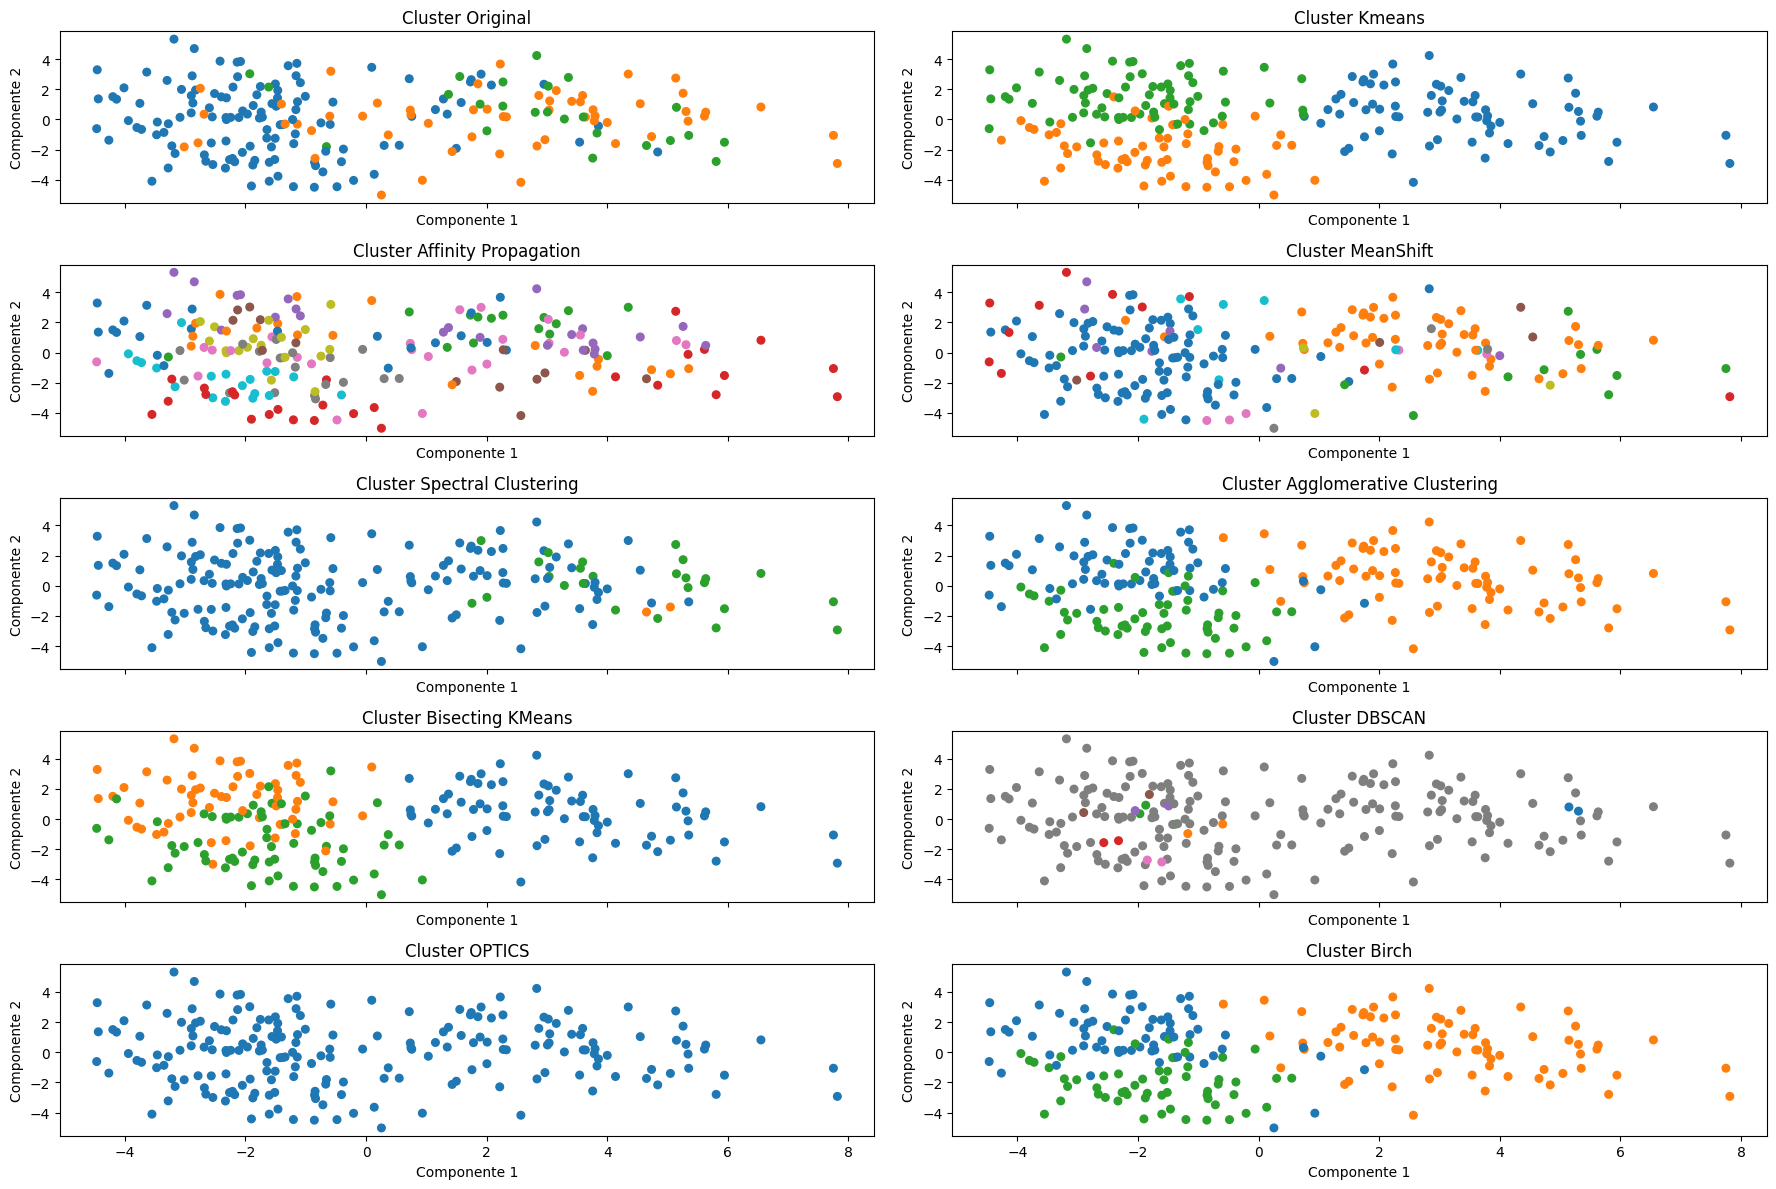

In [ ]:
#Utilizando la reducción de dimensioalidad PCA:

pca = PCA()
X_pca_sklearn = pca.fit_transform(X)

x = X_pca_sklearn[:, 0]
y = X_pca_sklearn[:, 1]

fig, axs = plt.subplots(5, 2, figsize=(18, 12), sharex=True)
# Recorre las columnas del dataframe 'clusters'
for i, ax in enumerate(axs.flatten()):
    nombre = clusters_df.columns[i]
    colores = by_cluster(clusters_df.iloc[:, i])
    ax.scatter(x, y, marker='o', s=30, c = colores)
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.set_title(f'Cluster {nombre}')

# Ajustes de diseño y visualización
plt.tight_layout()
plt.show()

###Resultados

Existen diversas formas de medir la calidad de los clusters formados, en este caso, vamos a guiarnos por el artículo midiendo el porcentaje de cada clase dentro de cada cluster formado.

In [ ]:
dict_df_clusters = {}

for c in clusters_df.columns:
  df = pd.concat([clases_df, clusters_df[c]], axis=1)
  conteo_df = df.groupby(['GROUP', c]).size().reset_index(name='Conteo')

  # Calcular el porcentaje para cada grupo
  conteo_df['Porcentaje'] = conteo_df.groupby(c)['Conteo'].transform(lambda x: round((x / x.sum()) * 100, 2))

  dict_df_clusters[c] = conteo_df

  print(conteo_df)



               GROUP  Original  Conteo  Porcentaje
0  COPD GOLD stage I         1      18       14.63
1  COPD GOLD stage I         2      45       80.36
2  COPD GOLD stage I         3      22       91.67
3            Control         1     105       85.37
4            Control         2      11       19.64
5            Control         3       2        8.33
               GROUP  Kmeans  Conteo  Porcentaje
0  COPD GOLD stage I       0      73      100.00
1  COPD GOLD stage I       1       5        8.20
2  COPD GOLD stage I       2       7       10.14
3            Control       1      56       91.80
4            Control       2      62       89.86
                GROUP  Affinity Propagation  Conteo  Porcentaje
0   COPD GOLD stage I                     0       8       80.00
1   COPD GOLD stage I                     1       9      100.00
2   COPD GOLD stage I                     2      14      100.00
3   COPD GOLD stage I                     3      10      100.00
4   COPD GOLD stage I        

In [ ]:
list(dict_df_clusters.keys())

['Original',
 'Kmeans',
 'Affinity Propagation',
 'MeanShift',
 'Spectral Clustering',
 'Agglomerative Clustering',
 'Bisecting KMeans',
 'DBSCAN',
 'OPTICS',
 'Birch']

In [ ]:
dict_df_clusters['MeanShift']

,GROUP,MeanShift,Conteo,Porcentaje
0,COPD GOLD stage I,0,3,3.23
1,COPD GOLD stage I,1,47,100.00
2,COPD GOLD stage I,2,7,100.00
3,COPD GOLD stage I,7,1,100.00
4,COPD GOLD stage I,8,1,100.00
5,COPD GOLD stage I,9,1,50.00
6,COPD GOLD stage I,11,1,33.33
7,COPD GOLD stage I,13,1,100.00
8,COPD GOLD stage I,15,1,100.00
9,COPD GOLD stage I,16,1,100.00


##Actividad: optimizar los resultados

Con el fin de mejorar los resultados obtenidos vamos a realizar diferentes procedimientos:



1.  Normalización: Implementa un procedimiento de normalización para los datos. Puedes utilizar técnicas como la normalización min-max o la normalización estándar (z-score).

2.   Selección de características:

*   Refiérete al artículo original para identificar las variables que los autores seleccionaron.
*   Realiza un nuevo análisis utilizando solo las variables seleccionadas por los autores en el artículo. Crea un DataFrame nuevo que contenga solo esas características.

3.   Ajuste de parámetros:

*   Consulta la [documentación oficial de scikit-learn](https://scikit-learn.org/stable/modules/clustering.html) para entender los parámetros de cada algoritmo.
*   Modifica los parámetros de cada algoritmo en base a la documentación y teniendo en cuenta las características específicas de tus datos. Puedes ajustar parámetros como el número de clústeres, la tasa de aprendizaje, etc.

Para realizar las actividades suba los bloques de código posteriores con las flechas de la derecha hasta antes del comienzo de las actividades de cluster, luego del bloque con el ejercicio de la actividad 1 resuelto.

In [ ]:
#Z-score
def norm_df(df):
    # Restar la media de cada columna
    df_centrado = df - df.mean()

    # Normalizar la varianza de cada columna
    df_normalizado = df_centrado / df.std()

    return df_normalizado

X_df = norm_df(X_df)

In [ ]:
#Estas lineas nos van a ayudar a seleccionar las columnas
import re

def columnas_interes(lista, patron):
    resultados = []

    for cadena in lista:
        if re.search(patron, cadena):
            resultados.append(cadena)

    return resultados

# Primero seleccionamos las columnas de porcentaje
columnas = list(X_df.columns)
patron = '%pred'

resultados = columnas_interes(columnas, patron)

resultados.extend(['Age\n(years)', 'Height\n(cm)', 'Gender\n(1=Male,\n2=Female)',
                   'Weight\n(kg)', 'BMI\n(kg/m2)', 'Smoking Status\n(0=Never Smoker,\n1=Ex-Smoker,\n2=Active Smoker)', 'Pack-Years',
                   'Cough\n(0=No,\n1=Yes)', 'Baseline Dyspnea Index Score','PreBD-FEV1/FVC', 'PostBD-FEV1/FVC', 'LLN-FEV1/FVC',
                   'IC/TLC', 'RV/TLC', 'VO2max\n(mL/min/kg)', 'VE at peak\n(L/min)', 'VE at peak\n(%MVV)', 'VT at peak\n(%VC pred)',
                   'VE/VO2peak', 'VE/VCO2peak', 'Borg Score - \nDyspnea Max', 'Borg Score - \nLeg Max',
                   'Steps/day', 'Mean Daily Time >3 mets\n(min)'])

X_df = X_df.loc[:, resultados]